In [1]:
import matplotlib
import numpy as np
import lcmsanalysis as la
import enzymeanalysis as da
import enzymeplots as dp
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
%matplotlib inline

## IMPORT DATA

In [3]:
with open('engineering_dataset.pickle', 'rb') as f:
    data_df = pickle.load(f)
sldf = la.lcms_df_processor(data_df, min_charges=8, min_contiguous_charges=4, max_big_peaks=1,
                      max_little_peaks=3, min_qqq_area=10000, min_qtof_area=1000)

/media/storage/EG/code/lcms-analysis/lcmsanalysis.py:386: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  grouped_df.set_value(ind, 'mod_area', mod_area+other_area)


In [4]:
sldf = sldf[sldf['media'] == 'TB']
mod_plasmids = [7060,7056,7069,7137,7138,7142,7147,7160,7169]
sldf = sldf[sldf['mod_plasmid'].isin(mod_plasmids)]

# Analyze core variant data for all the enzymes

/media/storage/EG/code/lcms-analysis/designeranalysis.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  subset['sequence'] = subset['sequence'].str.strip("*")
/home/eglassey/.local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


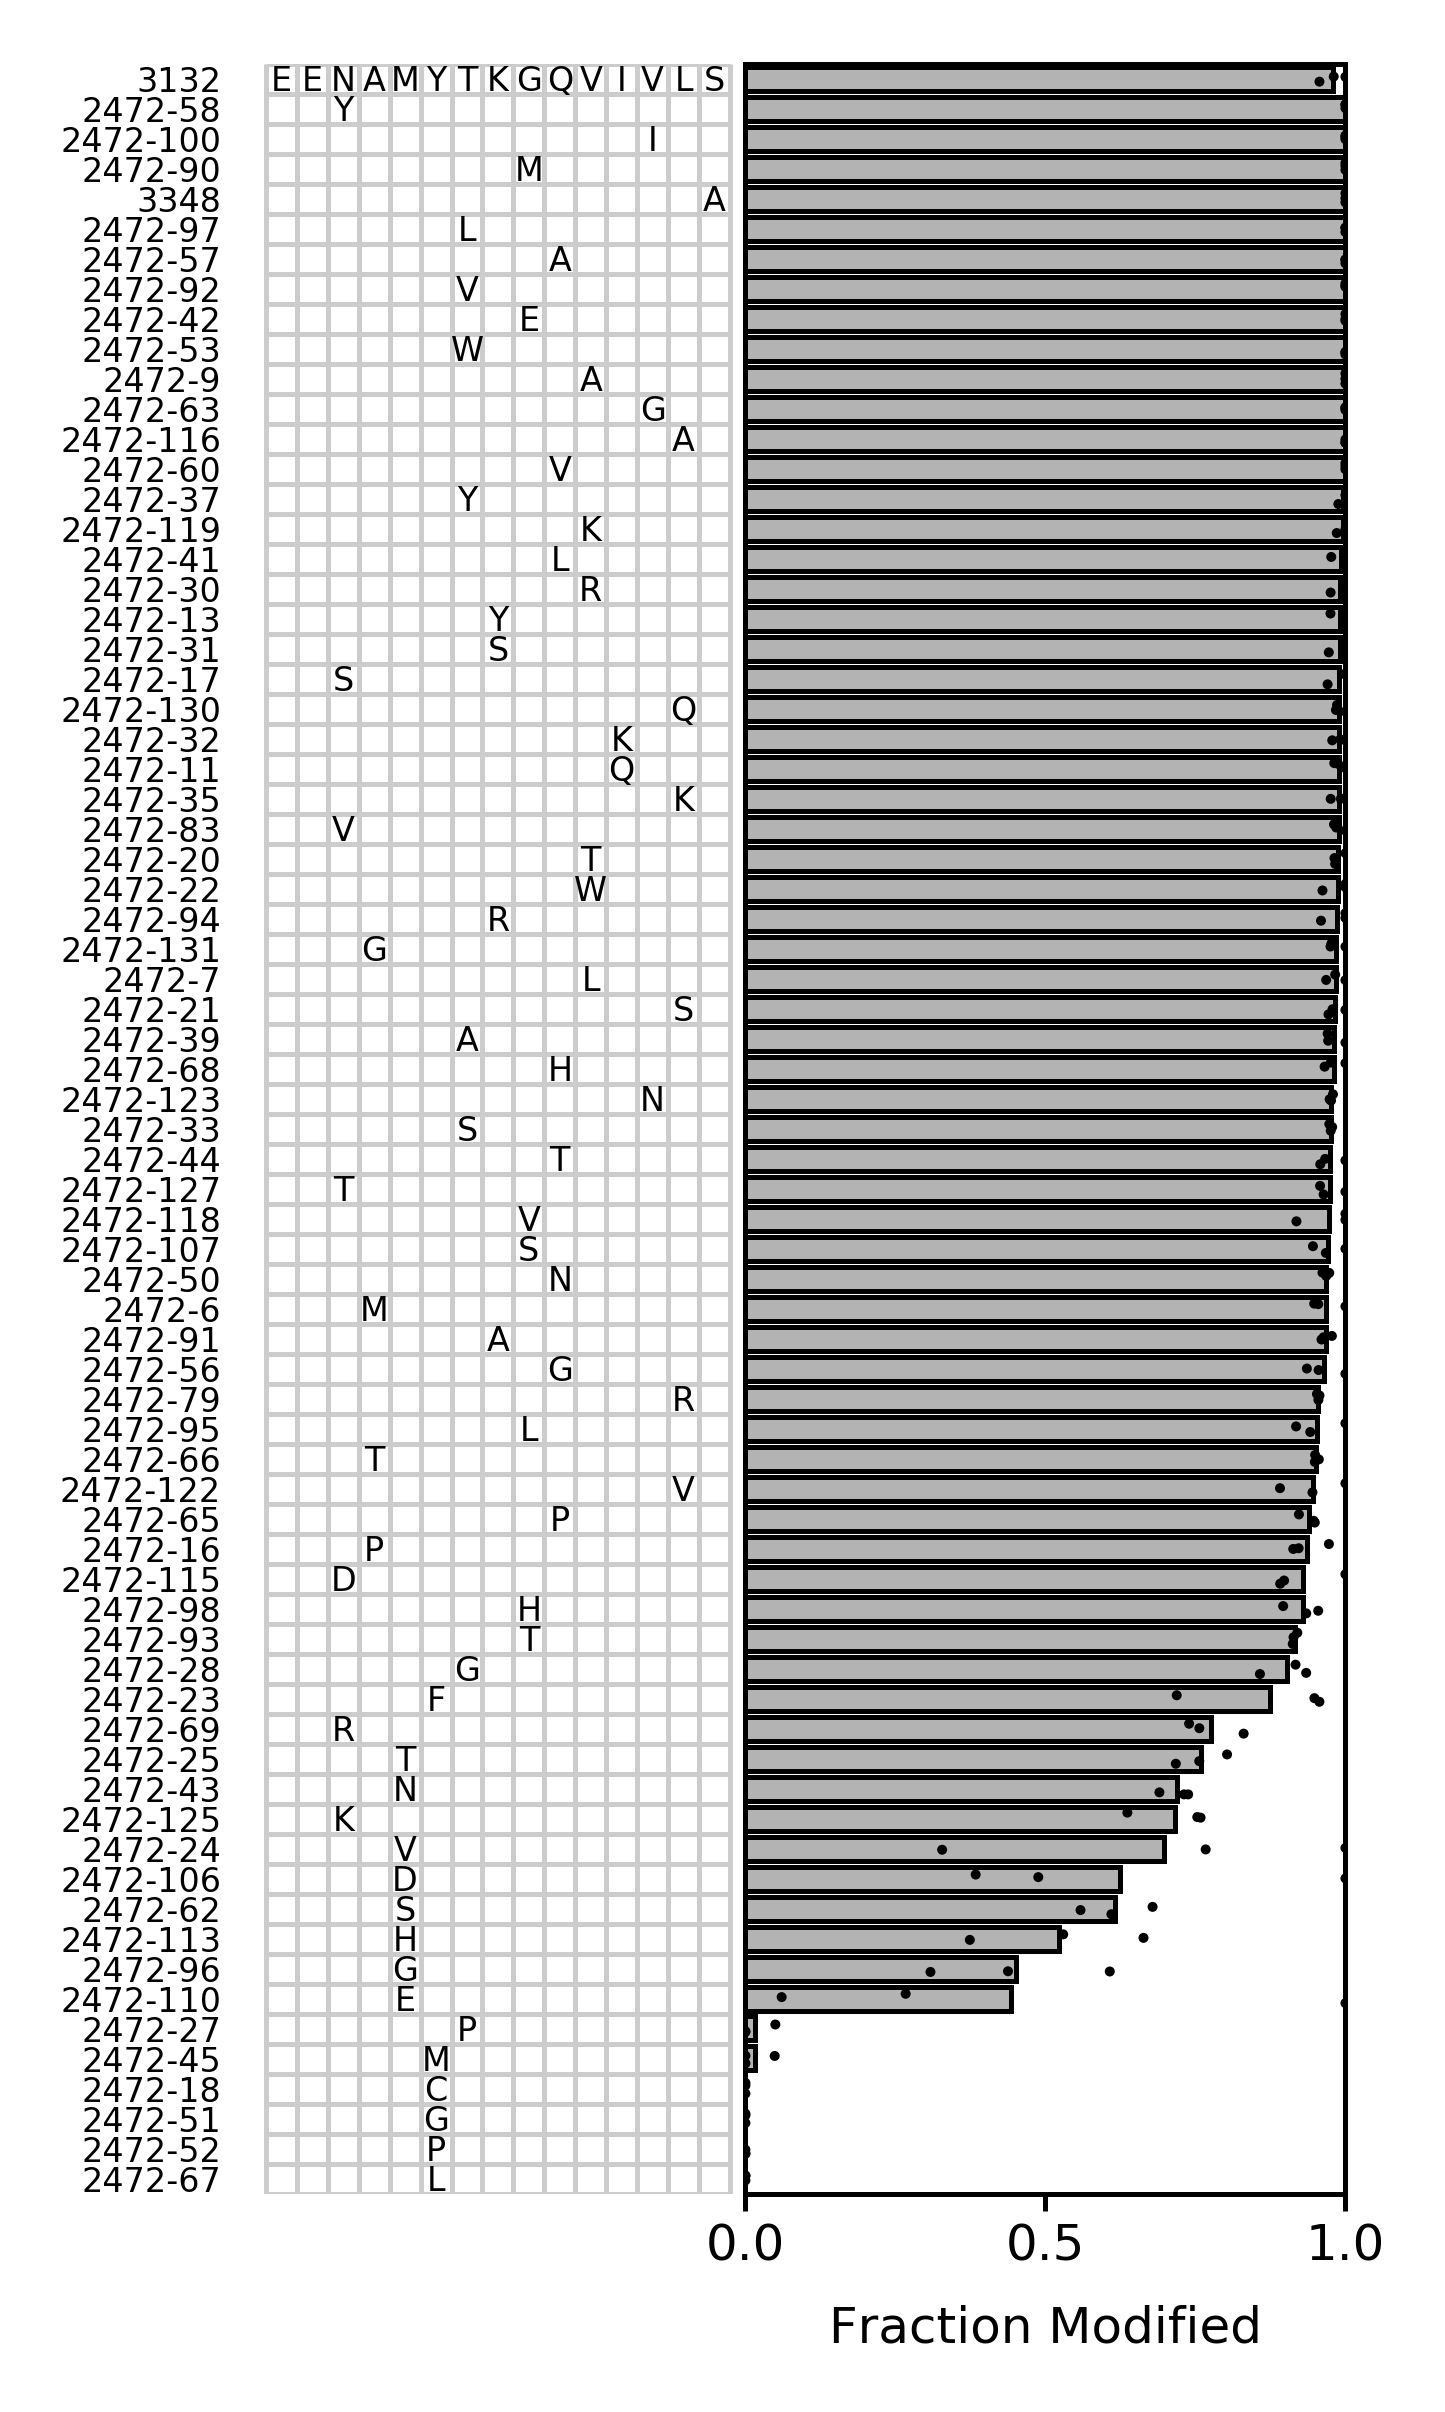

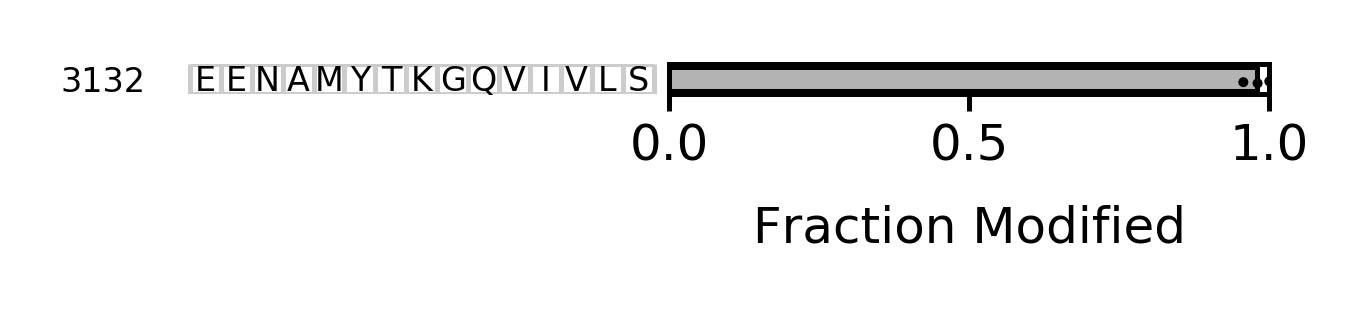

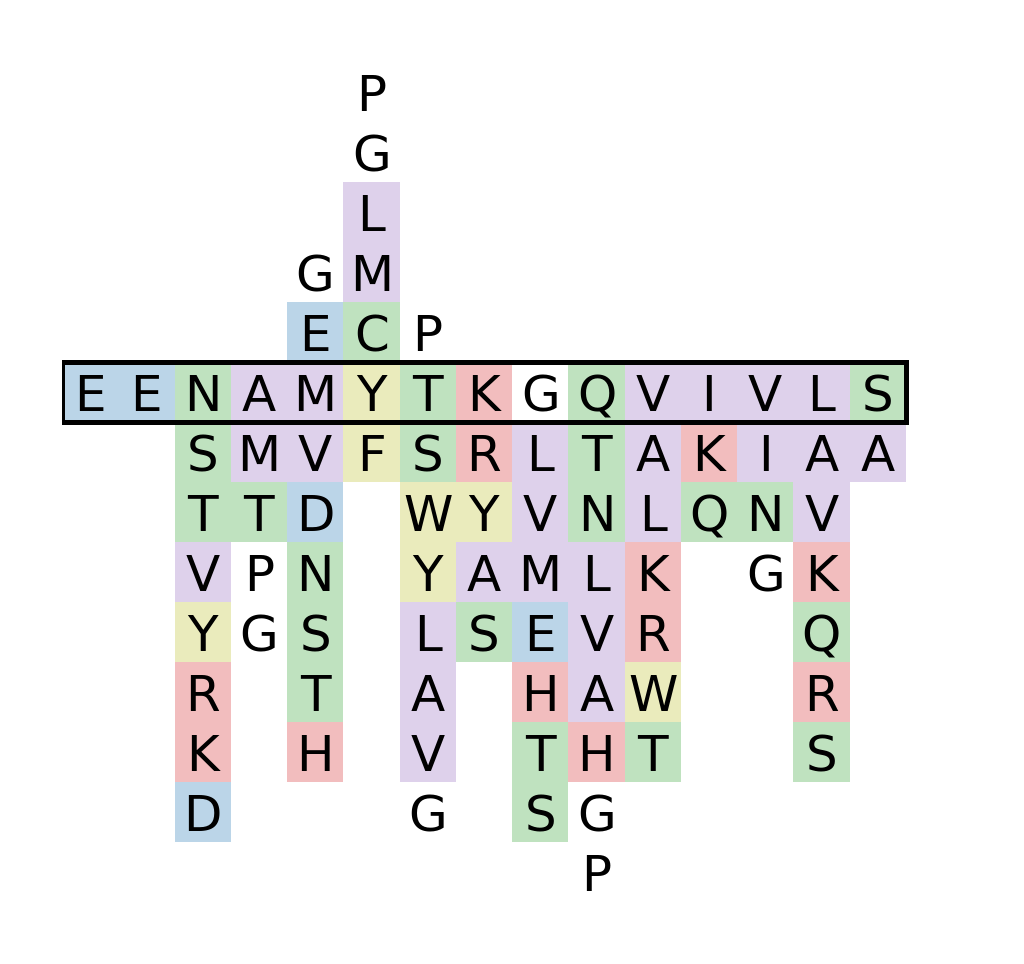

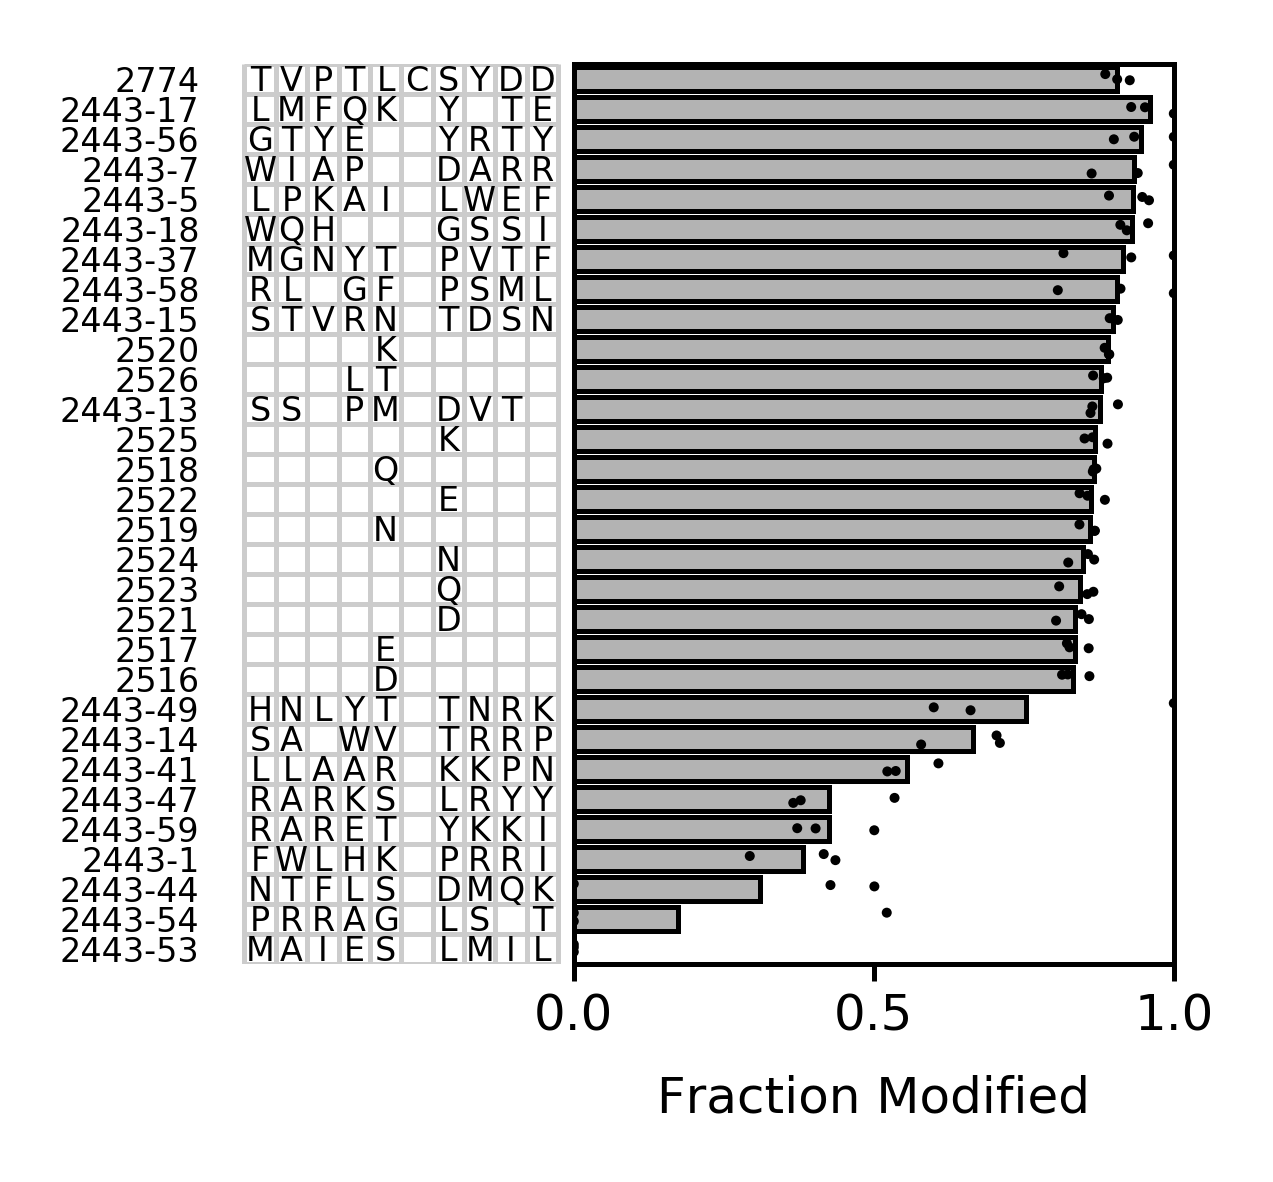

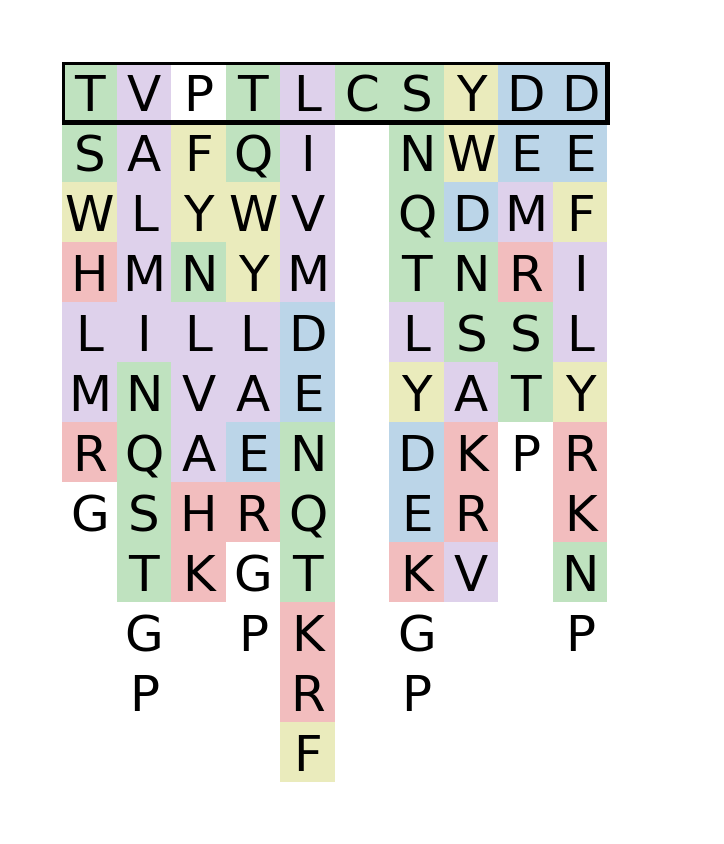

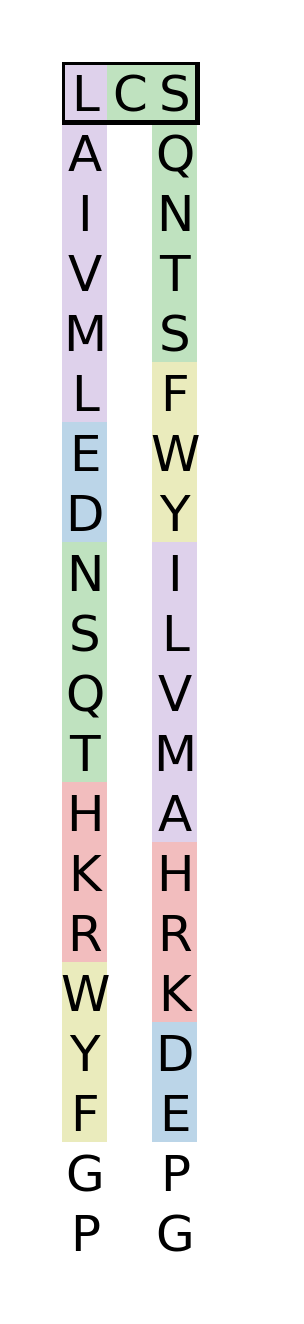

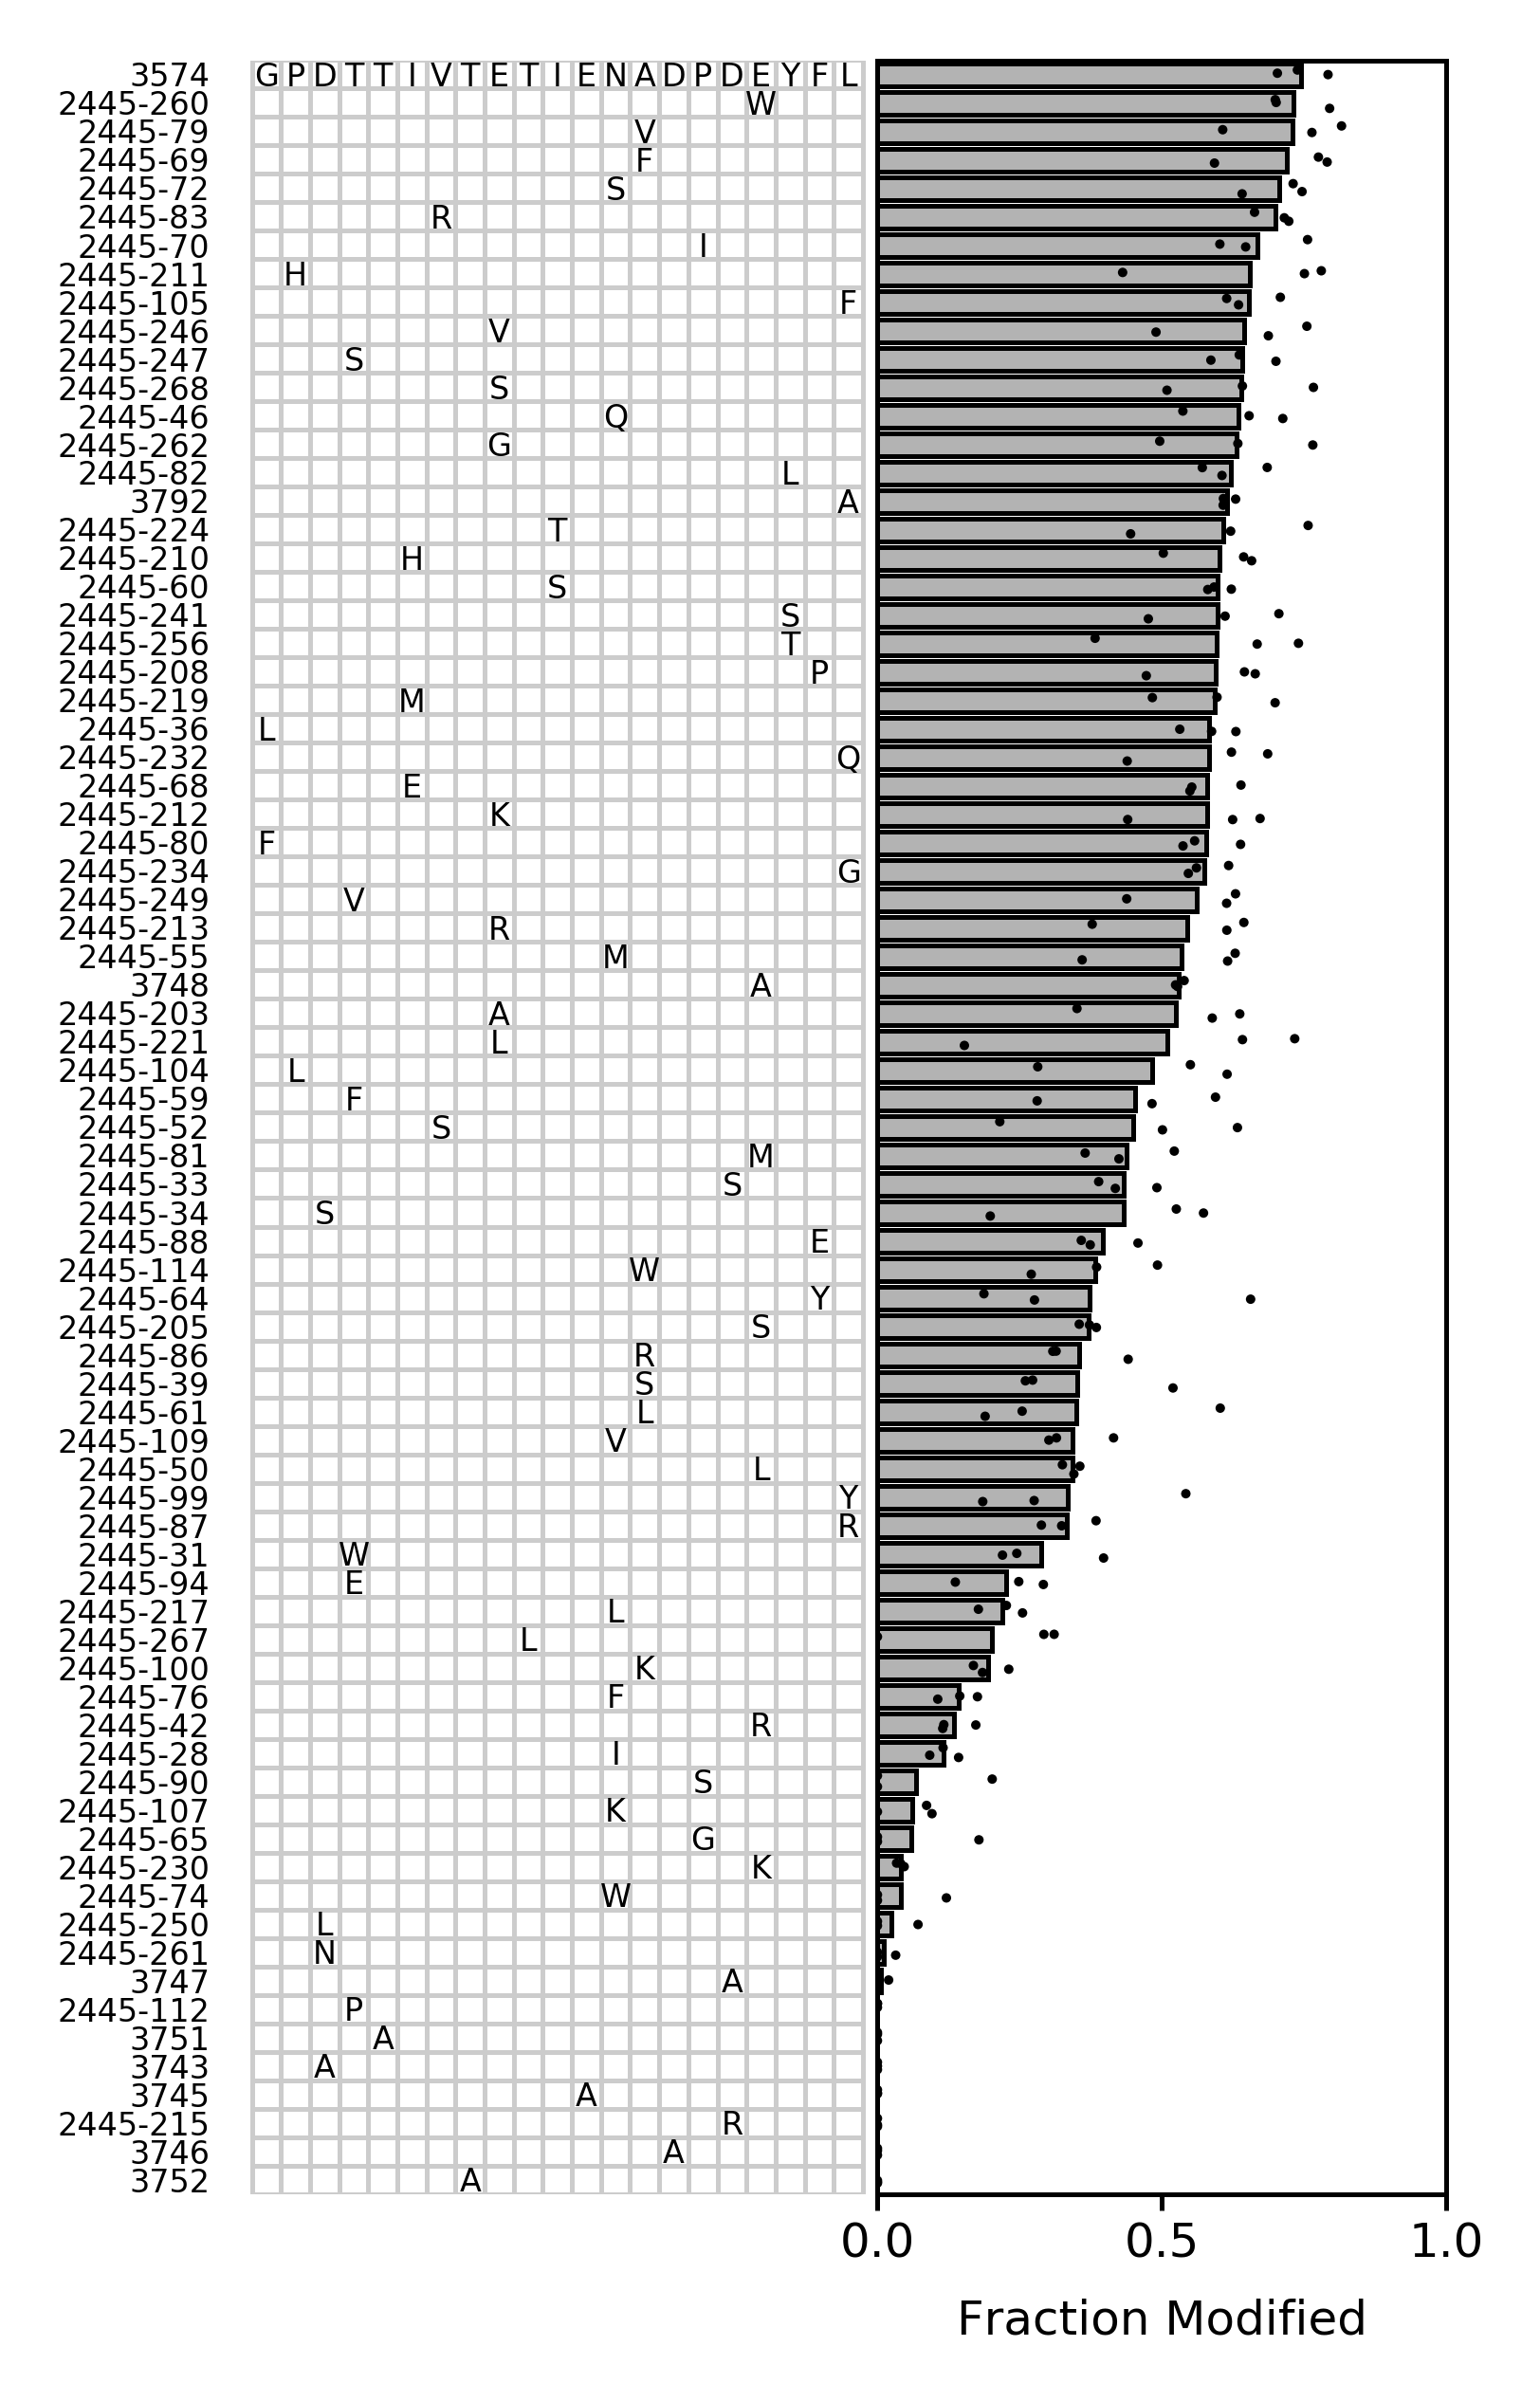

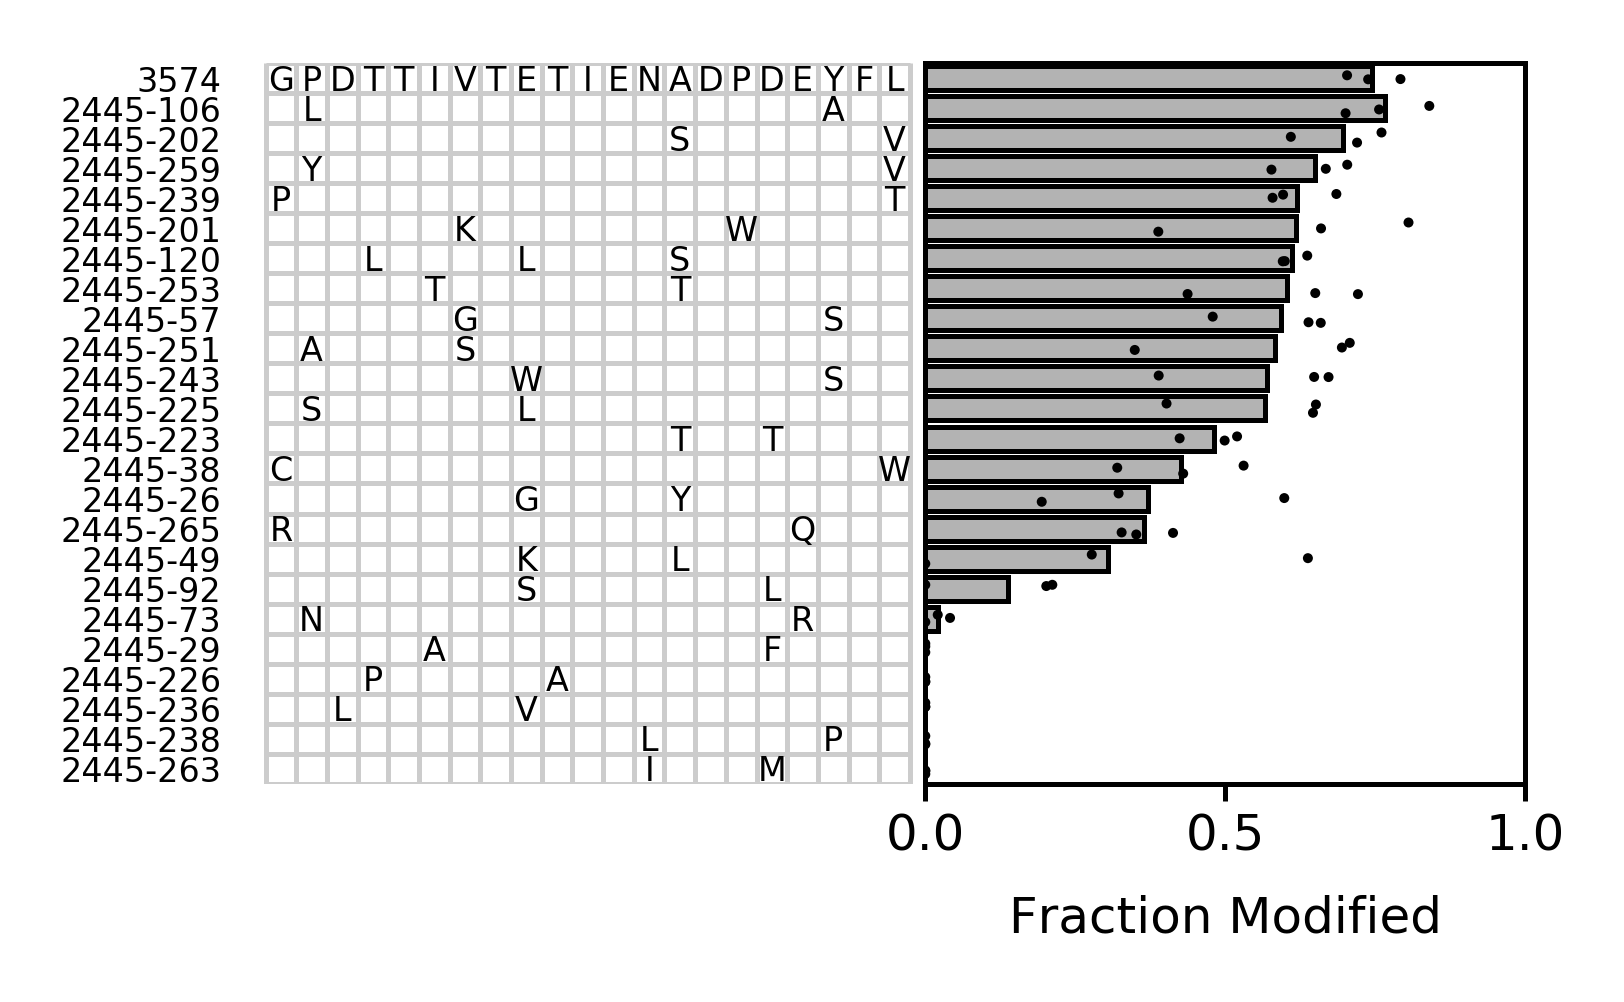

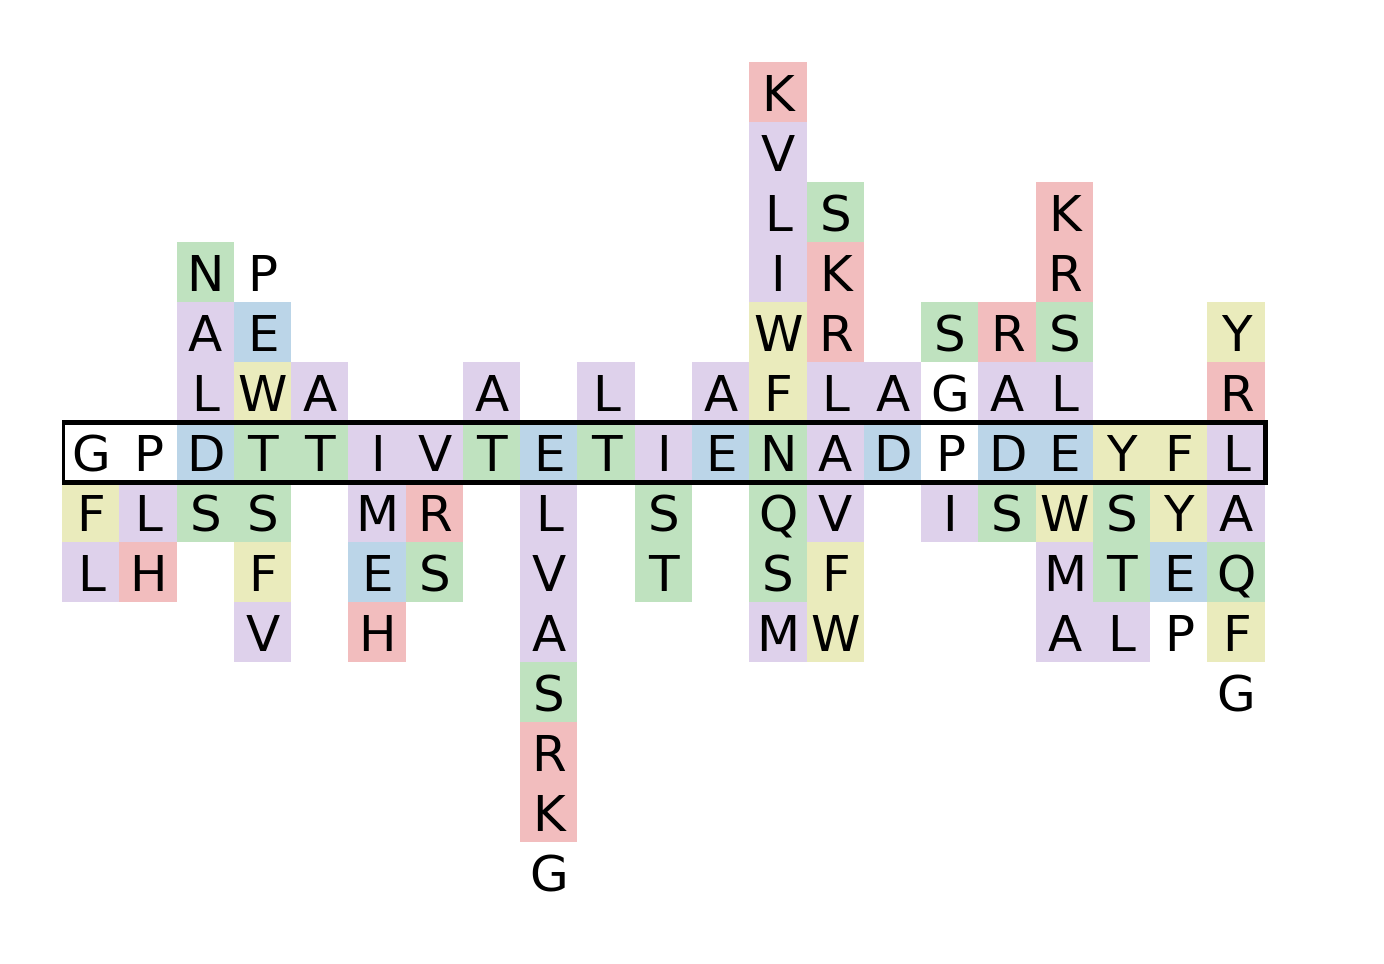

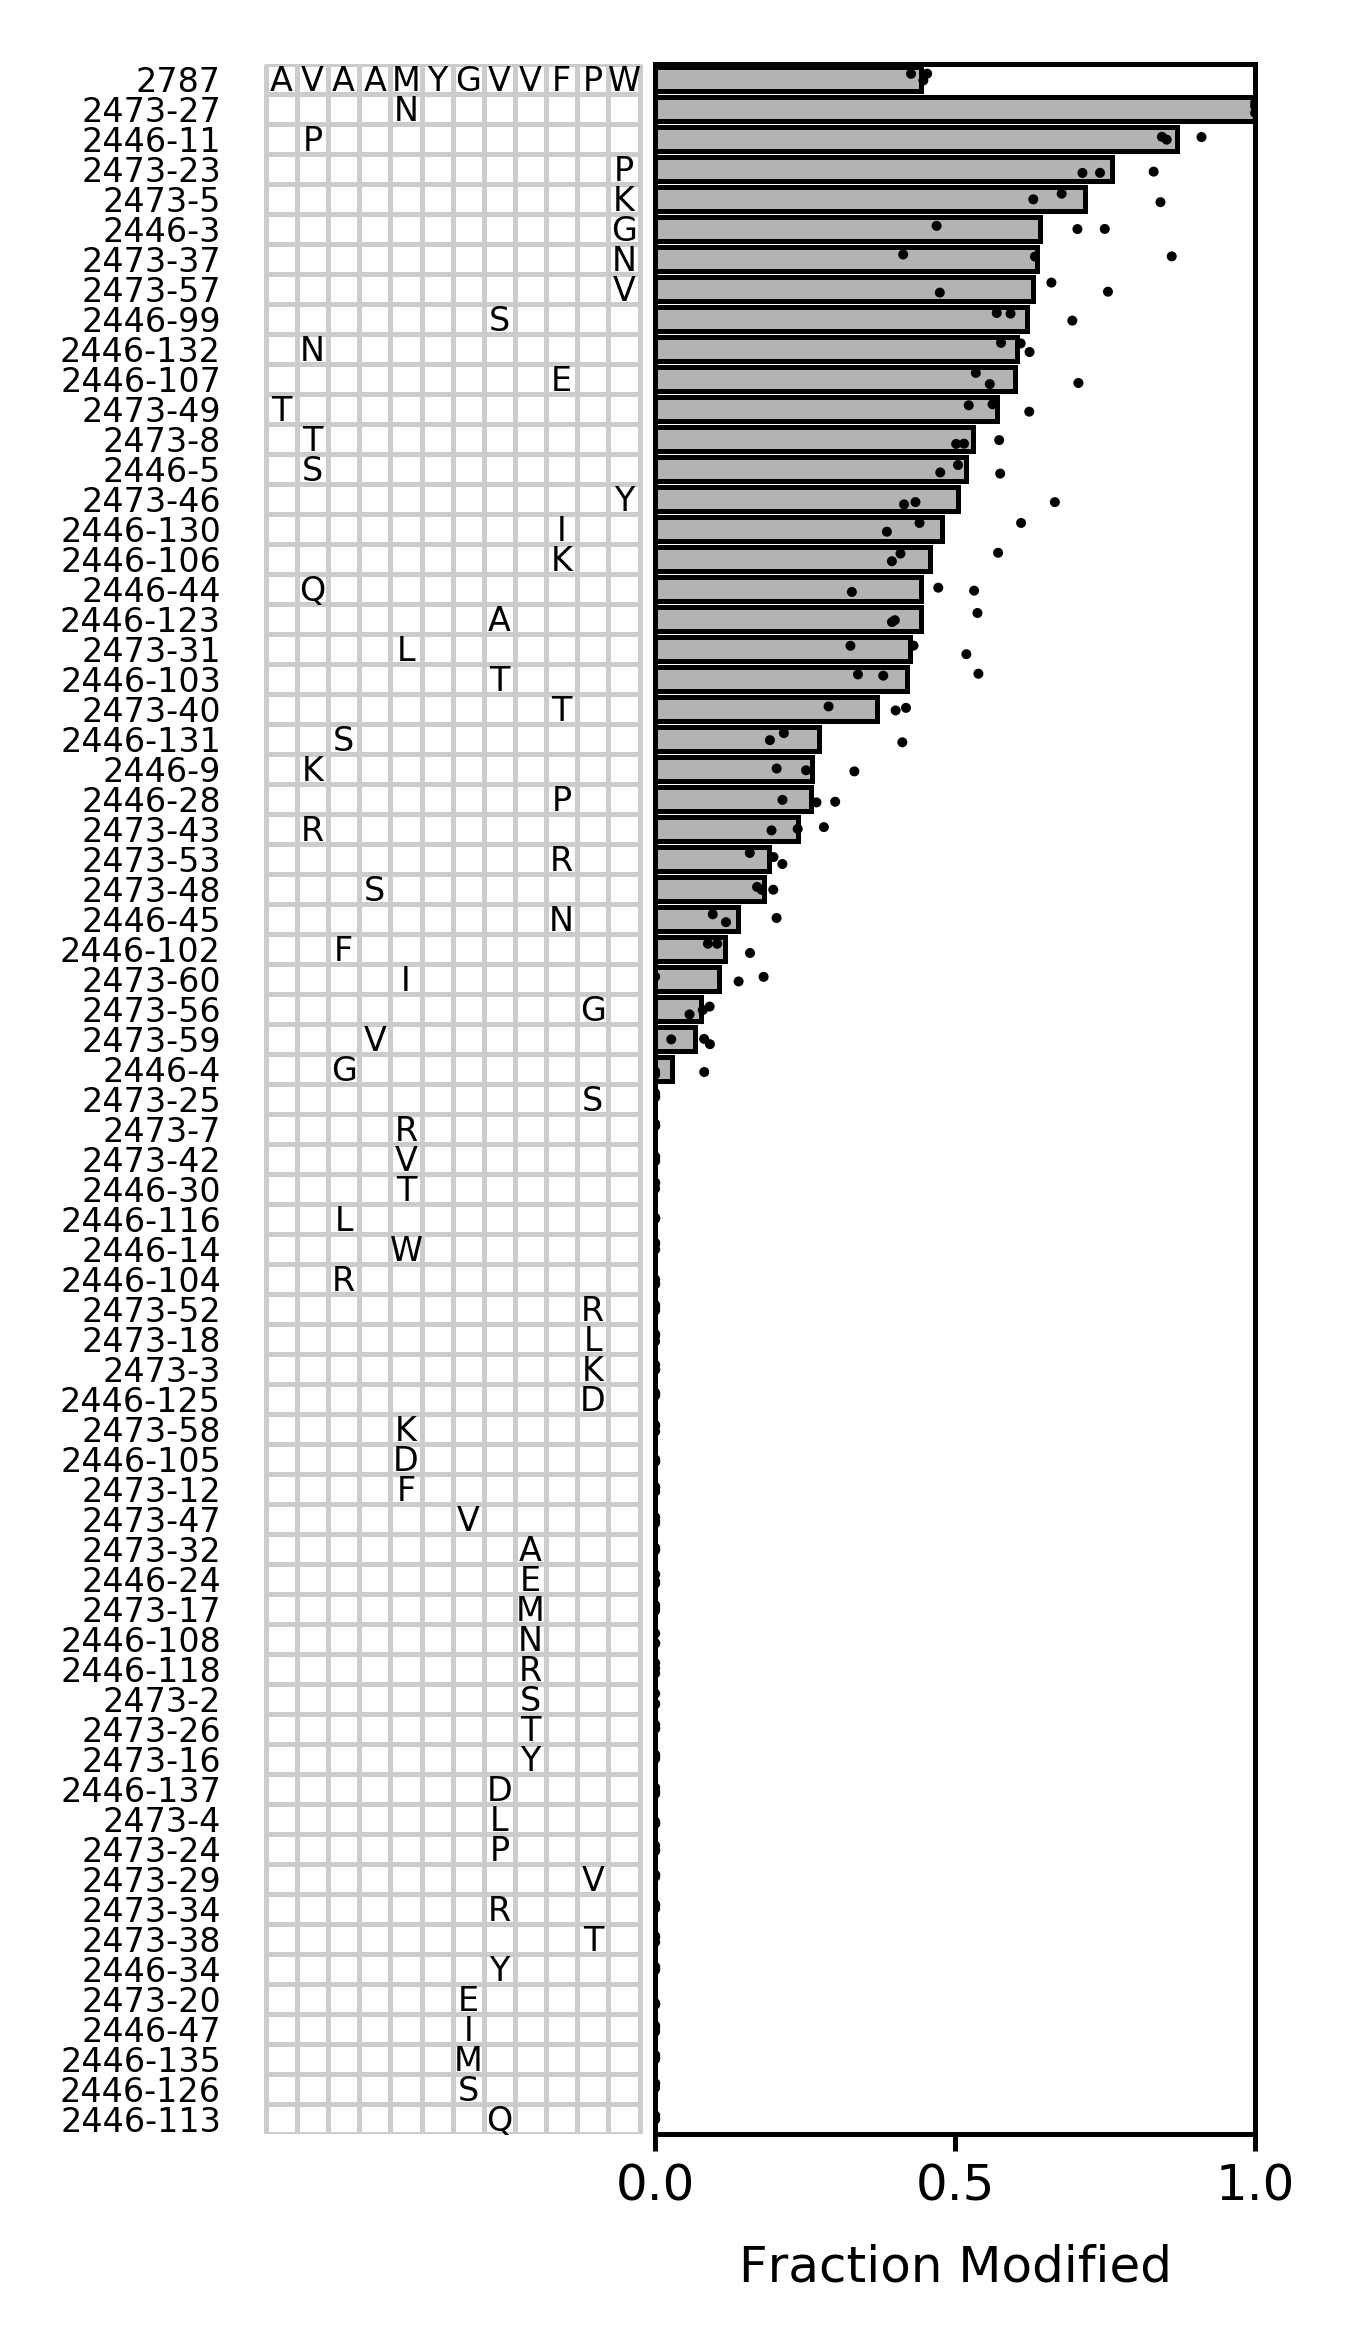

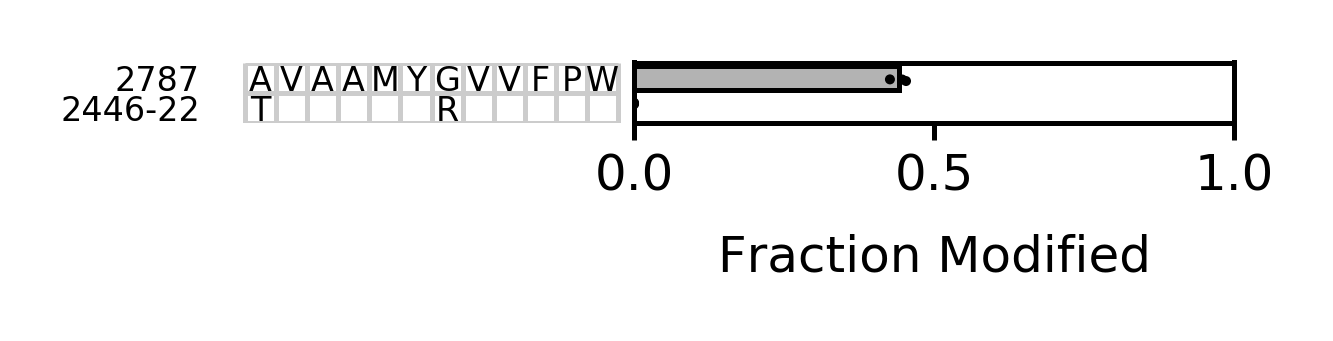

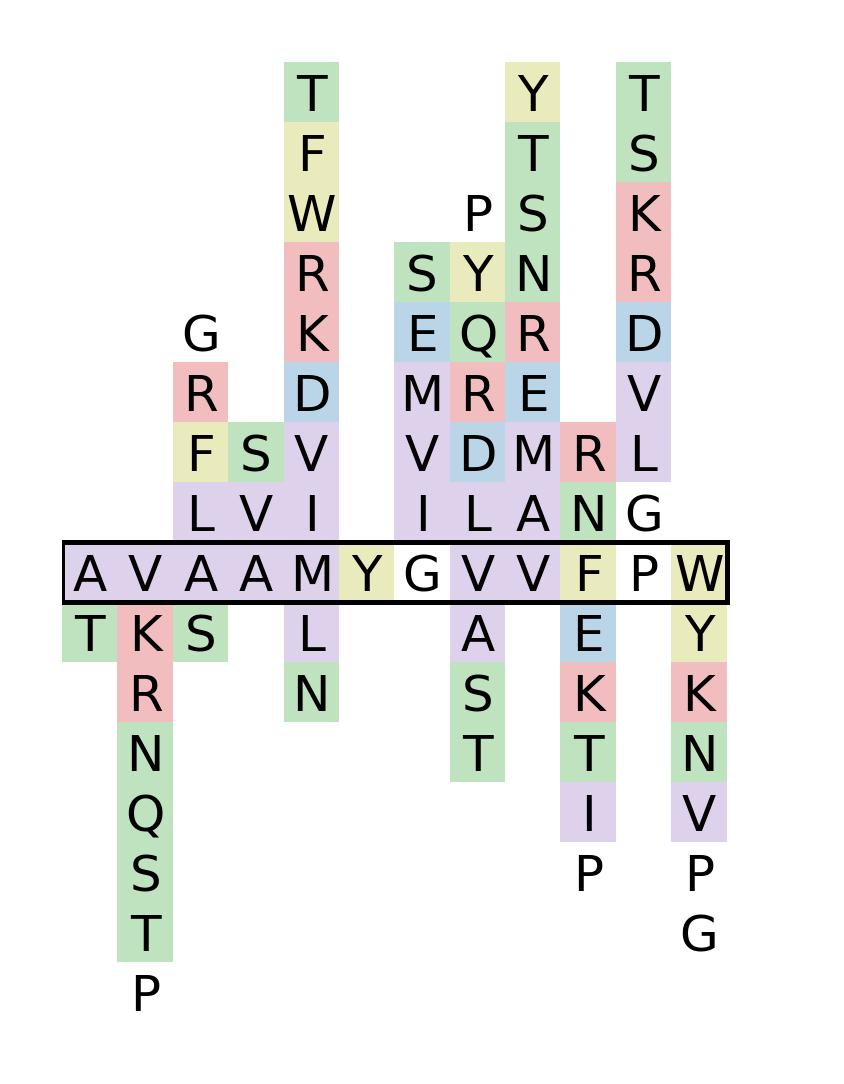

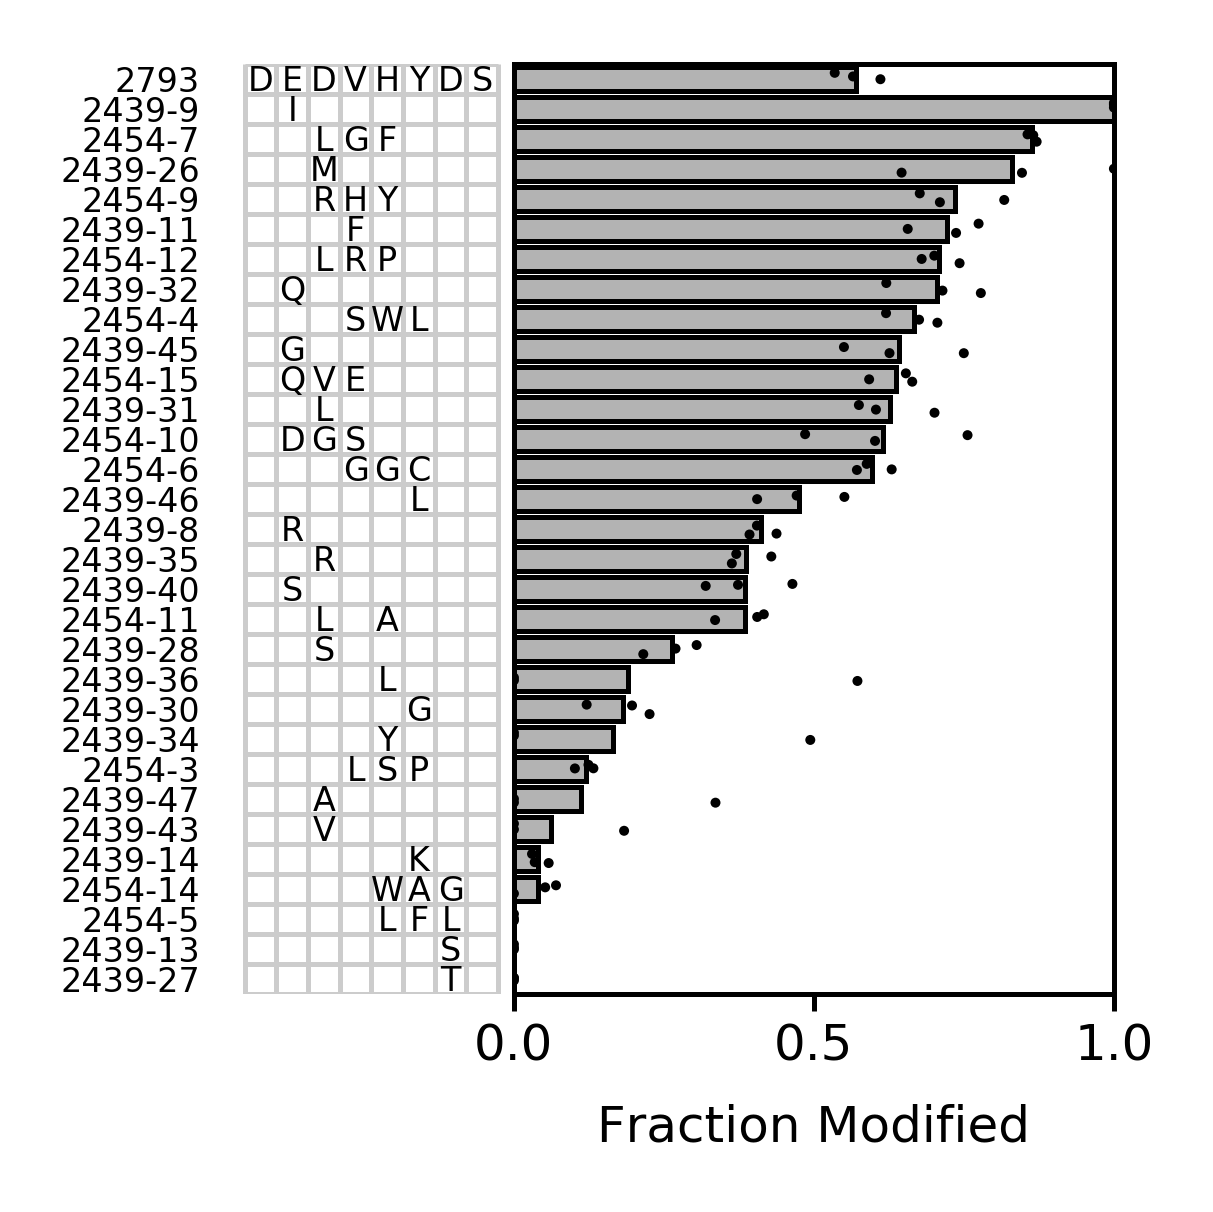

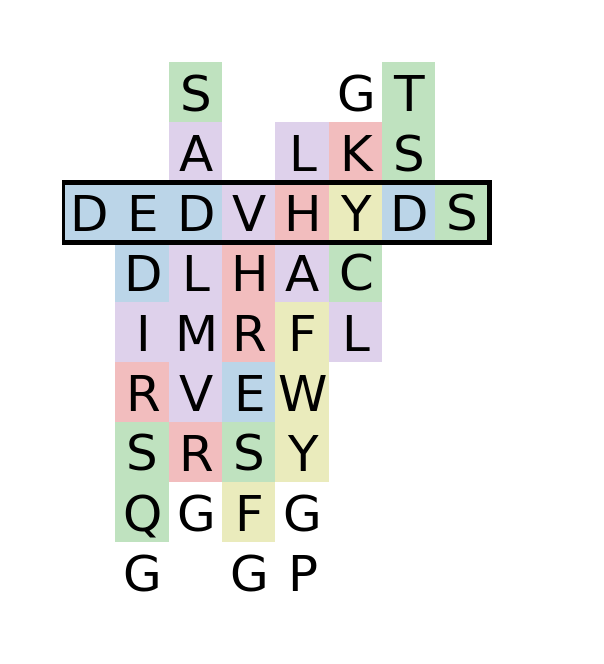

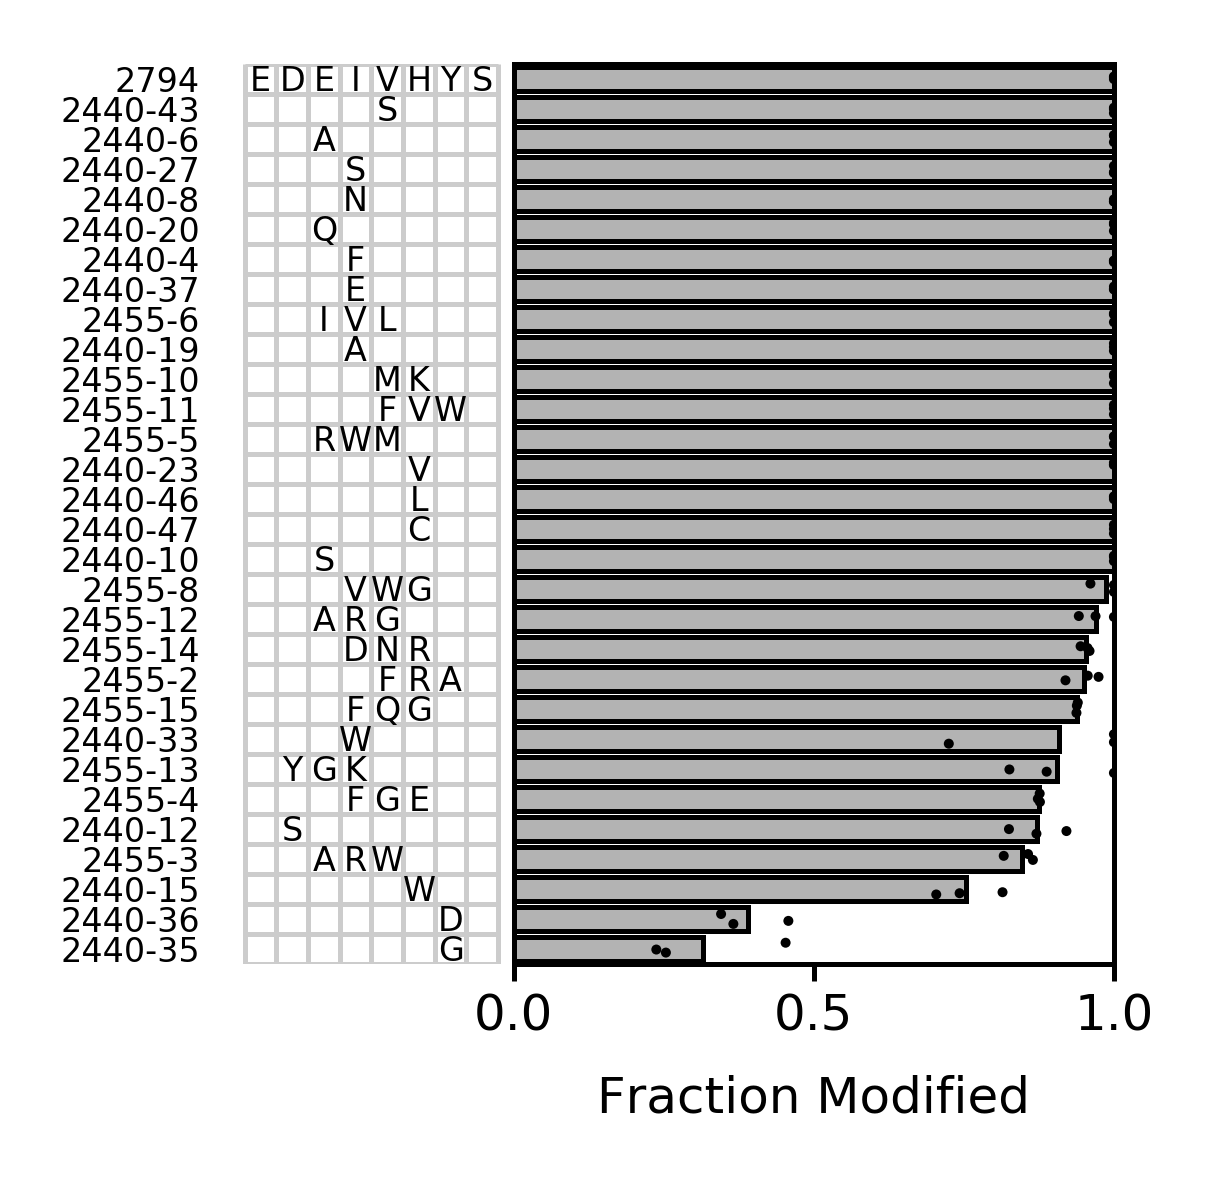

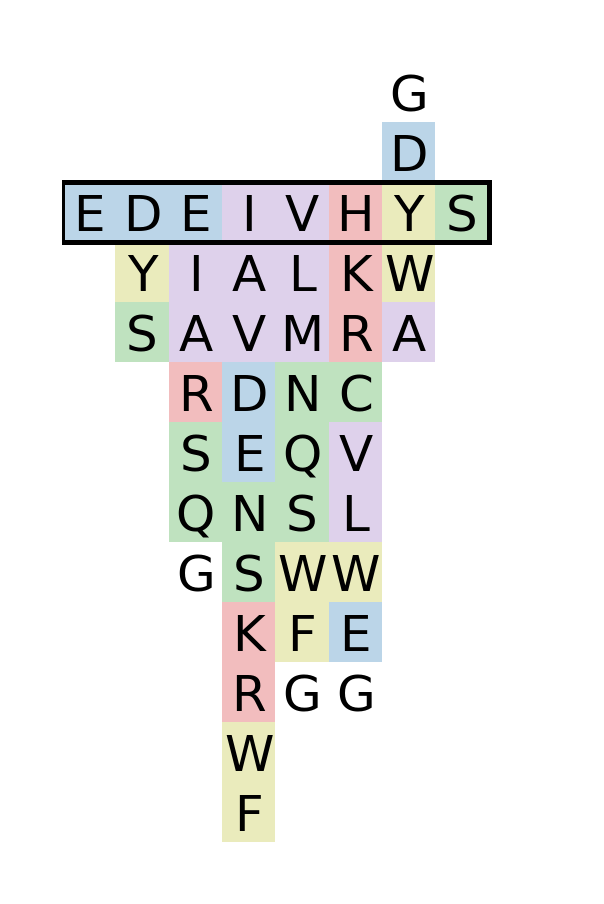

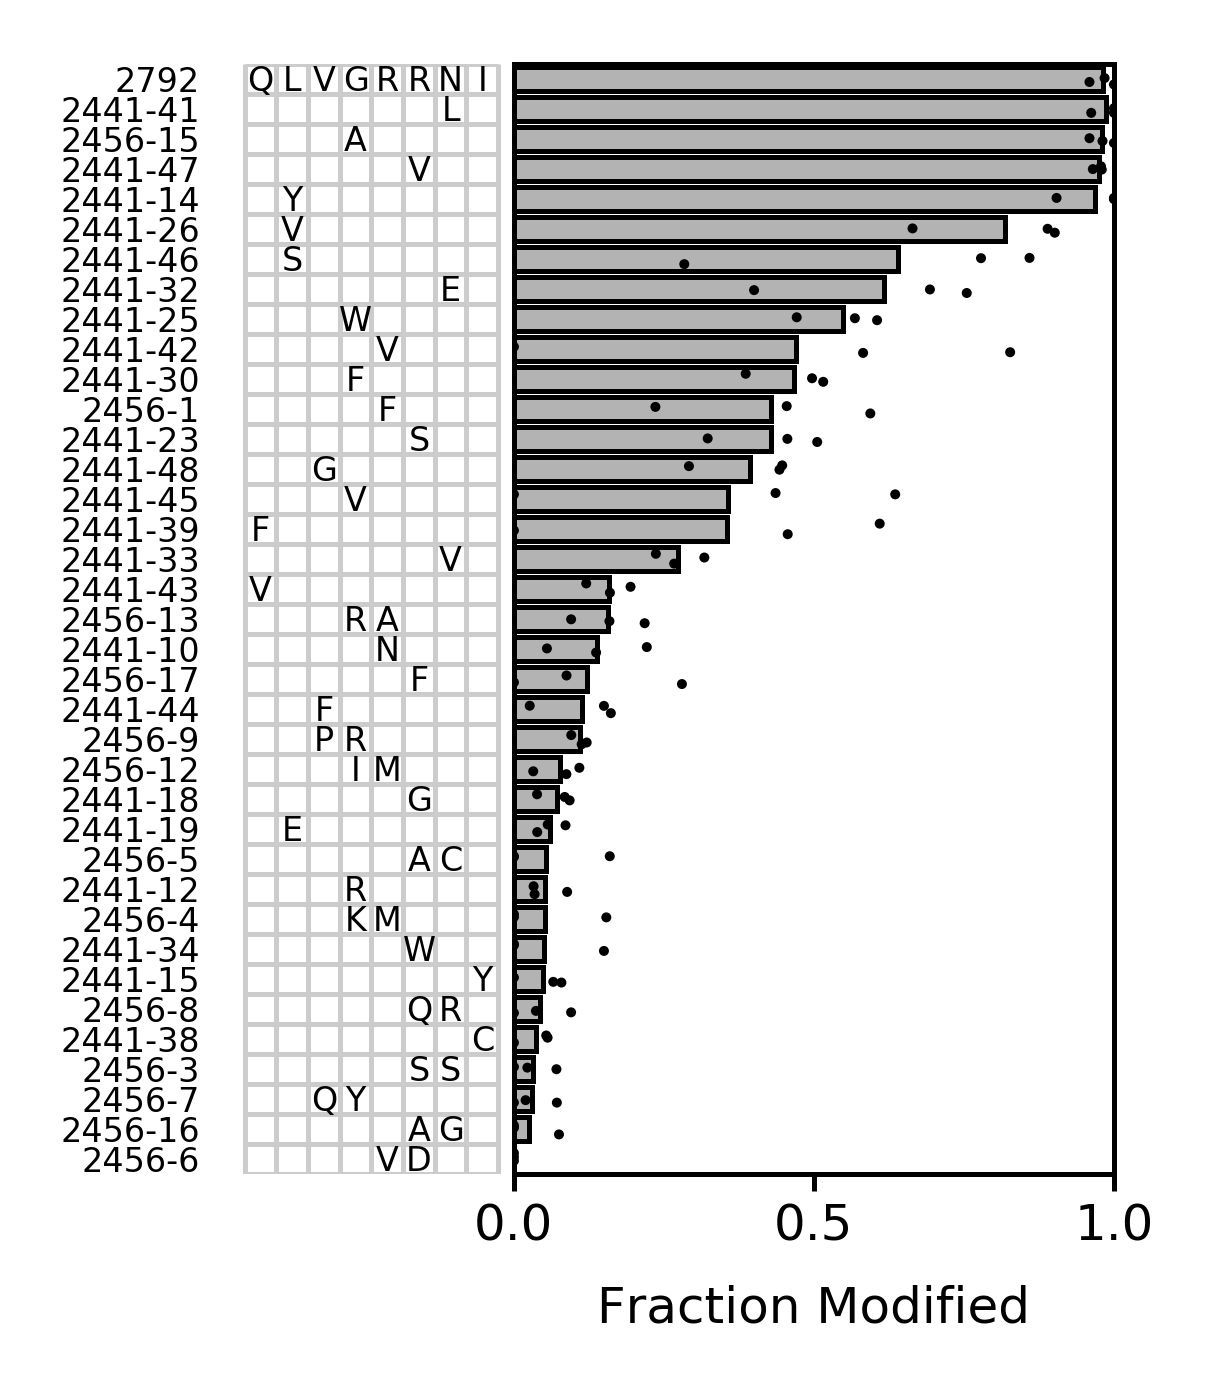

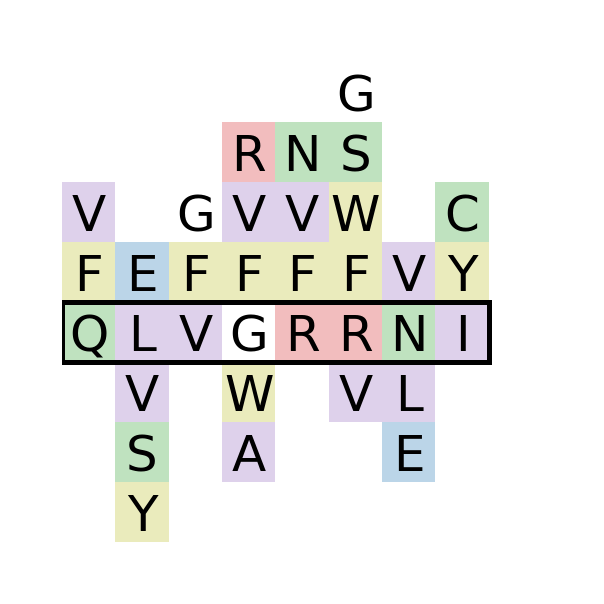

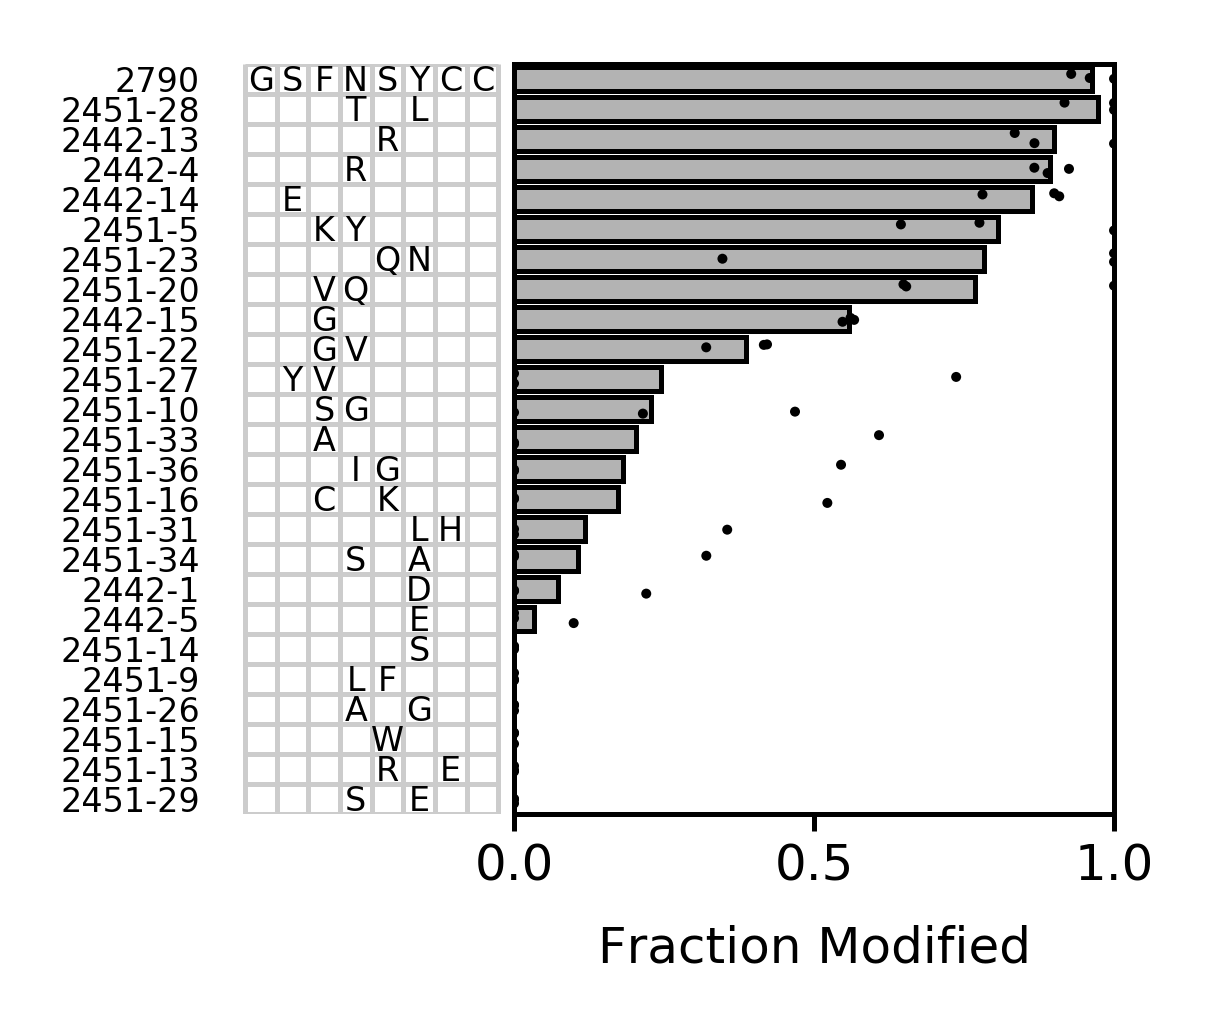

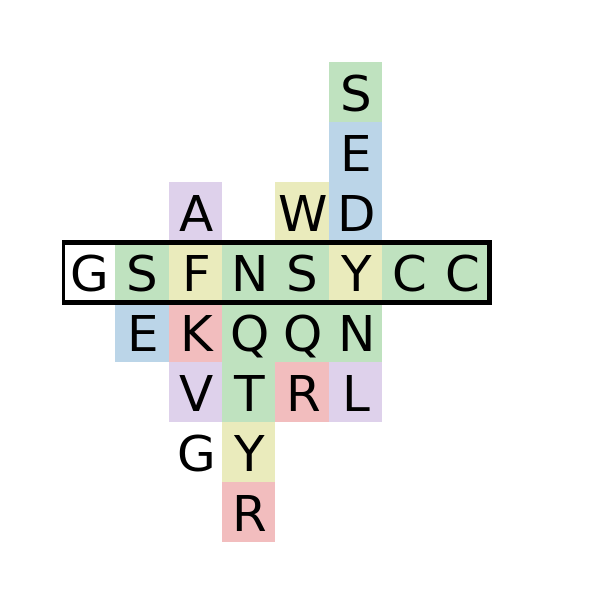

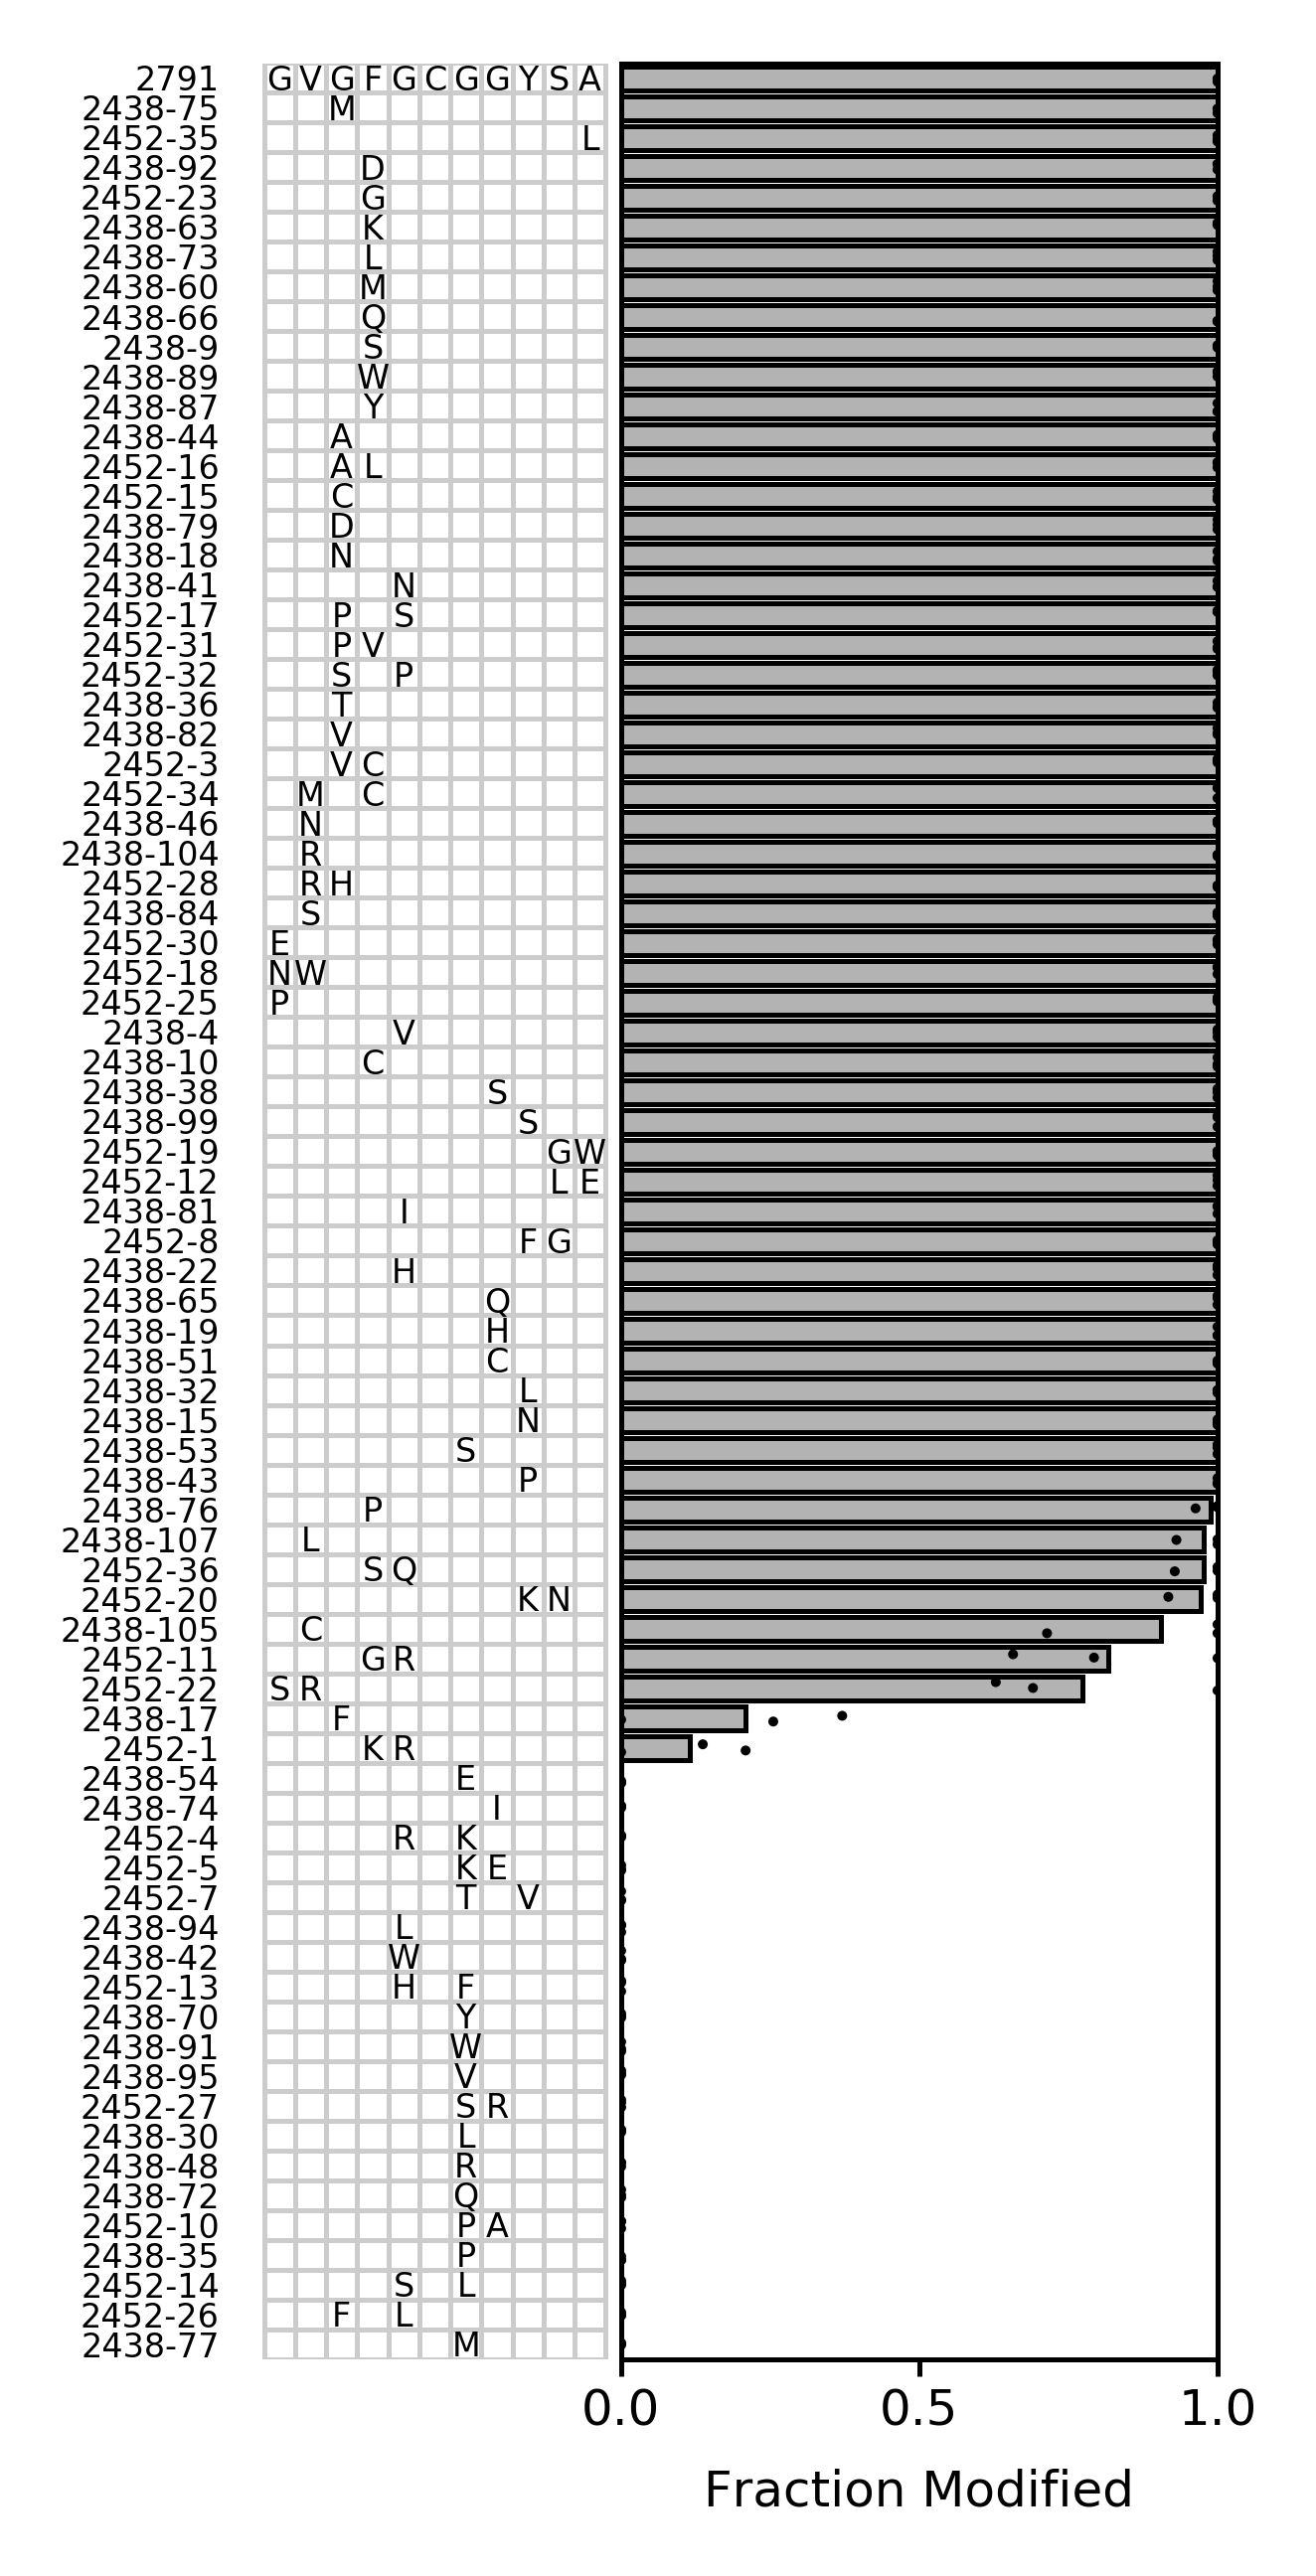

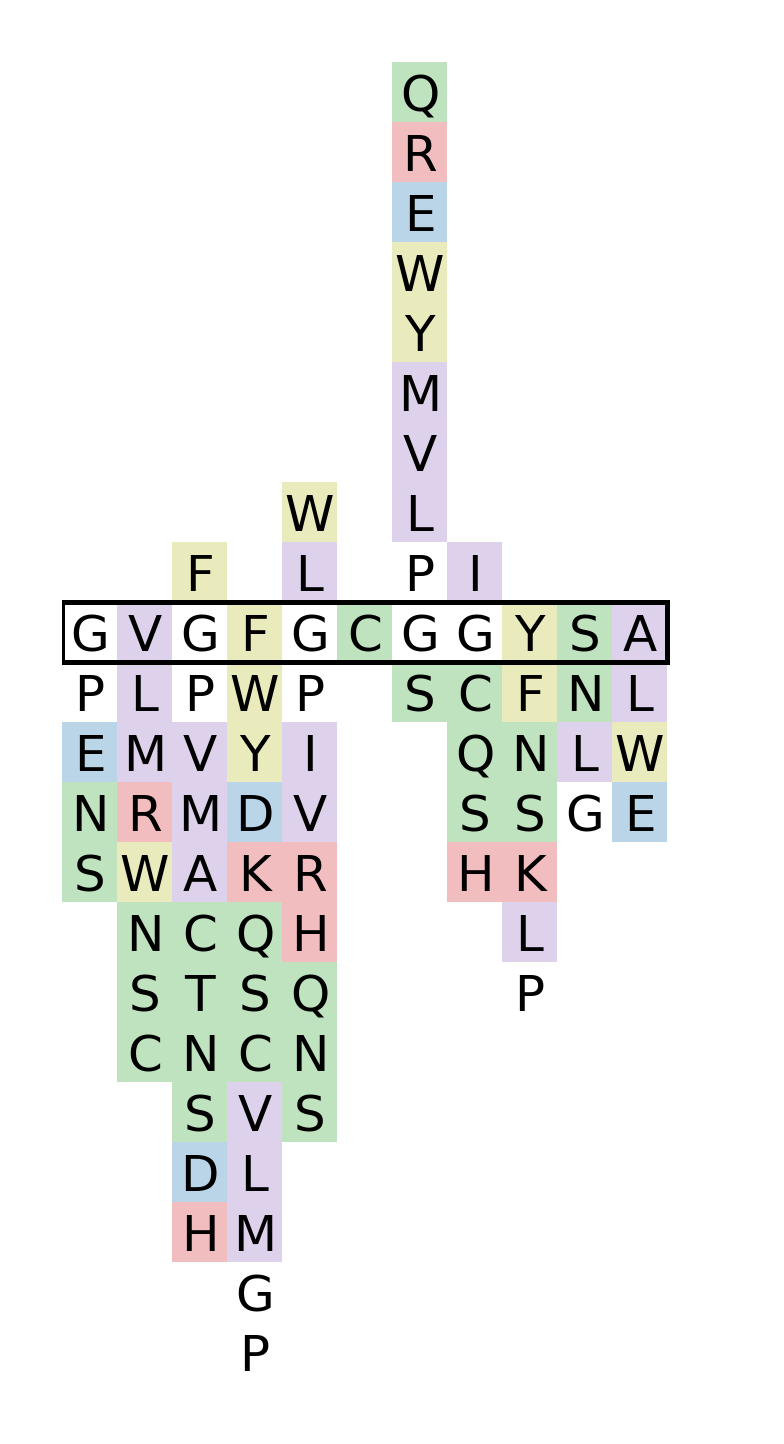

In [5]:
#paa
wt = 3132
leader = 'IKFSTLSQRISAIT'
core = 'EENAMYTKGQVIVLS'
extract_df = da.grab_peptides(sldf, wt, core, leader=leader, mismatches=[1,1])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/paa_core_matrix.pdf")

multi_extract_df = da.grab_peptides(sldf, wt, core, leader=leader, mismatches=[2,3])
dp.core_matrix_plot(multi_extract_df)
plt.savefig("./matplotlib/paa_core_multi-matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/paa_core_motif.pdf")


#lyn
wt = 2774
leader = 'SQLAELSEEALGGVDAS'
core = 'TVPTLCSYDD'
regy = '[FILWVMYPAGTSQNEDHKR]{5}C[FILWVMYPAGTSQNEDHKR]{4}$'
extract_df = da.grab_peptides_regex(sldf, regy, wt, core, leader=leader, min_mismatches=1)
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/lyn_core_matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
#The motif getting saved for the figure is not the motif generated from the data
# generate the figure motif
gaa = pd.DataFrame([dict([('mutation', x), ('mut_position', y)]) for x in "FILWVMYPAGTSQNEDHKR" for y in [0,2]])
dp.motif_plot("LCS", good_aas=gaa)
plt.savefig("./matplotlib/lyn_core_motif.pdf")

#tgn
wt = 3574
leader = 'YRPYIAKYVEEQTLQNSTNLVYDDITQISFINKEKNVKKINL'
core = 'GPDTTIVTETIENADPDEYFL'
extract_df = da.grab_peptides(sldf, wt, core, leader=leader, mismatches=[1,1])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/tgn_core_matrix.pdf")

multi_extract_df = da.grab_peptides(sldf, wt, core, leader=leader, mismatches=[2,3])
dp.core_matrix_plot(multi_extract_df)
plt.savefig("./matplotlib/tgn_core_multi-matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/tgn_core_motif.pdf")

#plp - remove 2446-(48-96)
wt = 2787
leader = 'NEELNEEELEAIAGG'
core = 'AVAAMYGVVFPW'
extract_df = da.grab_peptides(sldf, wt, core, leader=leader, mismatches=[1,1])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/plp_core_matrix.pdf")

multi_extract_df = da.grab_peptides(sldf, wt, core, leader=leader, mismatches=[2,3])
dp.core_matrix_plot(multi_extract_df)
plt.savefig("./matplotlib/plp_core_multi-matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/plp_core_motif.pdf")

#pade
wt = 2793
core = 'DEDVHYDS'
extract_df = da.grab_peptides(sldf, wt, core, mismatches=[1,3])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/pade_core_matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/pade_core_motif.pdf")

#thco
wt = 2794
core = 'EDEIVHYS'
extract_df = da.grab_peptides(sldf, wt, core, mismatches=[1,3])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/thco_core_matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/thco_core_motif.pdf")

#las
wt = 2792
core = 'QLVGRRNI'
extract_df = da.grab_peptides(sldf, wt, core, mismatches=[1,3])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/las_core_matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/las_core_motif.pdf")

#epi
wt = 2790
core = 'GSFNSYCC'
extract_df = da.grab_peptides(sldf, wt, core, mismatches=[1,3])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/epi_core_matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/epi_core_motif.pdf")

#pal - remove 3600-3700
wt = 2791
core = 'GVGFGCGGYSA'
extract_df = da.grab_peptides(sldf, wt, core, mismatches=[1,3])
dp.core_matrix_plot(extract_df)
plt.savefig("./matplotlib/pal_core_matrix.pdf")

wt_core, gaa, baa = da.generate_motif(extract_df)
dp.motif_plot(wt_core, good_aas=gaa, bad_aas=baa)
plt.savefig("./matplotlib/pal_core_motif.pdf")